

# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Medical Appointment No Shows dataset collects information from 100k medical appointments with characteristics about the patients such as gender, age, hipertension, diabetes, alcoholism and handcap, also the scheduled day and appointment day of   In this report I tried to answer three questions with visuals about why do patients miss their scheduled appointments? questions as follow: <ol> <li>Does the time between the scheduled day and appointment day affects the missed appointment ?</li> <li> Did sending sms to patients help to reduce missed appointments?  </li><li>   What is the percentage of missed appointments per day of the week? </li><li> Is there a relationship between gender and missed appointments?</li></ol>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

### Check if any missing values

In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> * There is no missing values 
>* All data types correct except the columns with date should be converted from string to date

### Check if any duplicated rows

In [5]:
sum(df.duplicated())

0

> There is no duplicated rows

### Check if gender column contains values other than (M,F)

In [6]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

### Check if age column contains negative age

In [7]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

> The row that contains negative age should be deleted

### Check for columns that hold zero or one if they contain values other than 0 or 1

In [8]:
df.Hipertension.unique()

array([1, 0])

In [9]:
df.Diabetes.unique()

array([0, 1])

In [10]:
df.Alcoholism.unique()

array([0, 1])

In [11]:
df.SMS_received.unique()

array([0, 1])

In [12]:
df.Handcap.unique()

array([0, 1, 2, 3, 4])

> There is a problem in Handcap column we need to fixes it to make the column values only 0 or  1

### Dataframe Cleaning 

In this section I will fix all problems I have observed in the previous section

### Drop unimportant columns

In [14]:
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)

In [15]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### lowercase labels and replace - with _

In [16]:
df.rename(columns=lambda x: x.strip().lower().replace("-","_"), inplace=True)

In [17]:
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Convert date columns from string to date type

In [18]:
df['scheduledday']= pd.to_datetime(df['scheduledday'])
df['appointmentday']= pd.to_datetime(df['appointmentday'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


### Handcap column should only be true or false (0,1)

In [20]:
mask= df.handcap > 1
column_name= 'handcap'
df.loc[mask,column_name]= 1

In [21]:
df.handcap.unique()

array([0, 1])

### Delete the row that contains -1 age

In [22]:
df= df[df['age']!=-1]

In [23]:
df.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

<a id='eda'></a>
## Exploratory Data Analysis



Put the code of draw bar plot and pie plot inside functions to avoid repetitive code.

In [117]:
def pie_plot(array,labels,explode,title):
    plt.axis('equal')
    plt.tight_layout()
    plt.pie(array,labels=labels,explode=explode,autopct='%.f')
    plt.title(title)
    plt.show()

In [123]:
def bar_plot(x,y,title,xlabel,ylabel):
    plt.bar(x,y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

### Q1. Does the time between the scheduled day and appointment day affects the missed appointment ?

> To answer the above question we need to add new column that reprsents the days between scheduled day and appointment

In [24]:
df['app_sch_days']= (df['appointmentday']-df['scheduledday']).dt.days

In [25]:
df.head(15)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,app_sch_days
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1
5,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,1
6,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1
7,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1
8,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,-1
9,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,1


In [26]:
# check the values in the new column
df.app_sch_days.unique()

array([ -1,   1,   2,   0,   3,   8,  28,   9,  22,  10,  17,  16,  13,
        27,  23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,
        45,  38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,
        83,  77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,
        48,  72,  63,  19,  32,  33,   5,  34,  35,  11,  12,  39,  46,
         7,   4,   6,  24,  25,  47,  26,  18,  60,  54,  61, 175,  53,
        76,  68,  82,  75,  88,  80, 102,  78,  67,  74,  84, 111,  -2,
        79,  85,  97,  93, 141, 154, 161, 168, 103, 132, 124,  95,  87,
        89, 150, 125, 126, 110, 118,  73,  70,  81, 107, 109, 101, 121,
       100, 104,  91,  96,  92, 106,  94,  -7, 138, 131, 178, 116, 145, 122])

In [27]:
import seaborn as sns
sns.set_style('darkgrid')

In [28]:
mean= df['app_sch_days'].mean()

In [29]:
# Count the rows with long time
h_temp= df[df['app_sch_days']>mean]
high_count= h_temp.groupby('no_show')['age'].count().reset_index(name='count_high')
high_count

,no_show,count_high
0,No,23246
1,Yes,11200


In [30]:
properation= high_count['count_high'].sum()
properation

34446

In [31]:
high_count['count_high']=(high_count['count_high']/properation)*100
high_count

,no_show,count_high
0,No,67.485339
1,Yes,32.514661


In [32]:
# # Count the rows with short time
L_temp= df[df['app_sch_days']<mean]
low_count= L_temp.groupby('no_show')['age'].count().reset_index(name='count_low')
low_count

,no_show,count_low
0,No,64961
1,Yes,11119


In [33]:
properation= low_count['count_low'].sum()
properation

76080

In [34]:
low_count['count_low']=(low_count['count_low']/properation)*100
low_count

,no_show,count_low
0,No,85.385121
1,Yes,14.614879


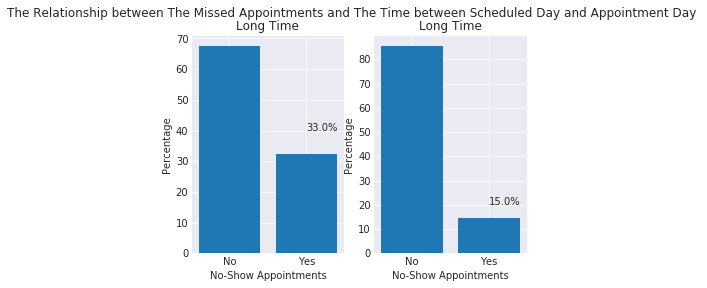

In [122]:
plt.subplot(1,2,1)
title='Long Time'
xlabel= 'No-Show Appointments'
ylabel= 'Percentage'
x= high_count['no_show']
y= high_count['count_high']
plt.yticks(np.arange(0,110,step=10))
t= str(round(high_count['count_high'][1],0))+"%"
plt.annotate(t,(1,40))
bar_plot(x,y,title,xlabel,ylabel)


plt.subplot(1,2,2)
x=low_count['no_show']
y=low_count['count_low']
xlabel='No-Show Appointments'
plt.yticks(np.arange(0,110,step=10))
t= str(round(low_count['count_low'][1],0))+"%"
plt.annotate(t,(1,20) )
bar_plot(x,y,title,xlabel,ylabel)

plt.suptitle('The Relationship between The Missed Appointments and The Time between Scheduled Day and Appointment Day ')
title='Short Time'
plt.show()

> The above plot shows that if the time between the scheduled day and appointment day is long then the possibility of missed appointment will increased to the half

### Q2. Did sending sms to patients help to reduce missed appointments?

The below Pie charts reprsent that sending sms to patients resulted in decrease missed appointments by 8%

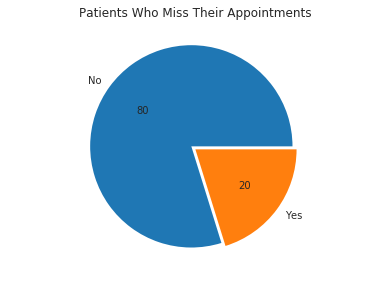

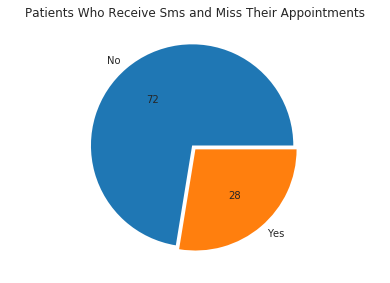

In [118]:
#Patients Miss Their Appointments'
no= df.query('no_show == "No"').count()
yes= df.query('no_show == "Yes"').count()
explode=(0.05,0)
labels=['No','Yes']
array=[no[0],yes[0]]
title= 'Patients Who Miss Their Appointments'
pie_plot(array,labels,explode,title)

#Patients Who Receive Sms and Miss Their Appointments'
received= df.query('sms_received == "1"')
no= received.query('no_show == "No"').count()
yes= received.query('no_show == "Yes"').count()
explode=(0.05,0)
title= 'Patients Who Receive Sms and Miss Their Appointments'
labels= ['No','Yes']
array= [no[0],yes[0]]
pie_plot(array,labels,explode,title)


### Q3. What is the percentage of missed appointments per day of the week?

The percentage of missed appointments per day of the week is close

>First I have extracted the name of the day form date

In [39]:
df['day']= df['appointmentday'].apply(lambda x:x.strftime('%A'))

>Count the showed up appointments

In [40]:
df_no= df[df['no_show']=="No"]
x= df_no.groupby('day')['day'].count().reset_index(name='count')
x

,day,count
0,Friday,14982
1,Monday,18024
2,Saturday,30
3,Thursday,13909
4,Tuesday,20488
5,Wednesday,20774


>Count the missed appointments

In [41]:
df_yes= df[df['no_show']=="Yes"]
y= df_yes.groupby('day')['day'].count().reset_index(name='count')
y

,day,count
0,Friday,4037
1,Monday,4690
2,Saturday,9
3,Thursday,3338
4,Tuesday,5152
5,Wednesday,5093


>Sum all appointments of each day of the week

In [42]:
sum_no_yes= np.add(x['count'],y['count'])
sum_no_yes.index=x['day']
sum_no_yes

day
Friday       19019
Monday       22714
Saturday        39
Thursday     17247
Tuesday      25640
Wednesday    25867
Name: count, dtype: int64

>Divide all appointments by missed appointments

In [43]:
properation= np.divide(sum_no_yes,y['count'])
properation

day
Friday       4.711172
Monday       4.843070
Saturday     4.333333
Thursday     5.166866
Tuesday      4.976708
Wednesday    5.078932
Name: count, dtype: float64

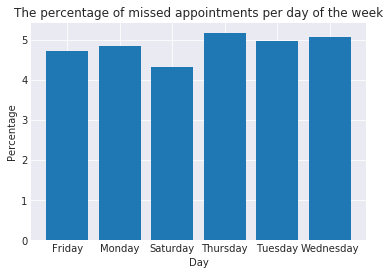

In [124]:
x= properation.index
y= properation
title='The percentage of missed appointments per day of the week'
xlabel= 'Day'
ylabel= 'Percentage'
bar_plot(x,y,title,xlabel,ylabel)
plt.show()

## Q4. Is there a relationship between gender and missed appointments?

The below tow figures reprsents that there is no difference between the percentage of men and women in missed appointments 

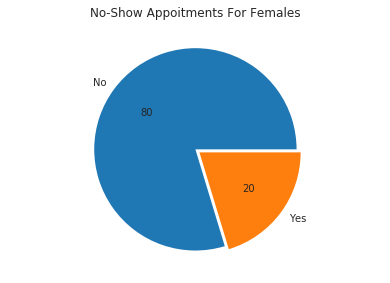

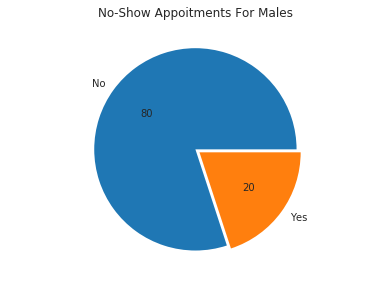

In [99]:
female= df.query('gender=="F"')
pie_plot(female.groupby('no_show')['gender'].count(),['No','Yes'],(0,0.05),'No-Show Appoitments For Females')

male= df.query('gender=="M"')
pie_plot(male.groupby('no_show')['gender'].count(),['No','Yes'],(0,0.05),'No-Show Appoitments For Males')

<a id='conclusions'></a>
## Conclusions

By answering the previous questions it became clear to us that there is a relationship between the missed appointments and the  time between scheduled day and appointment day, the possibility of missed the appointment it will be higher also sending reminders messages to patients reduced the possibility of canceling the appointment only by 8%.
We also note that the percentage of appointments missed by men and women is equal

<b>Results:</b> our data suggest that:
    <ol>
    <li> There is a relationship between the missed appointments and the time between scheduled day and appointment day, the possibility of missed the appointment if the time is long it will be higher than short time </li> 
    <li> Sending reminders messages to patients reduced the possibility of canceling the appointment only by 8%</li> 
    <li> The percentage of missed appointments per day of the week is close</li> 
    <li>The percentage of appointments missed by men and women is equal </li> 
    </ol>   
    
<b>Limitations:</b> There are a couple of limitations in our data:
     <ol>
     <li>Most of our variable is categorical which doesn't allow for show correlation between factors such as the correlation between the distance of hospital and patient home </li>
     <li>We don't have a lot of details for certain factors such as the type of handicap the patient's suffer or the appointment at any hospital clinic? The missed appointments may be at some clinics more than others </li>   
     </ol>

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])